In [42]:
# для автозагрузки изменений в модулях без необходимости перезагрузки kelner
%load_ext autoreload
%autoreload 2

# необходимо для корректного импорта своих модулей в JupyterLab
import sys
current_dir = sys.path[0]
project_dir = 'SF_DS_Pro'
last_position = current_dir.find(project_dir) + len(project_dir)
project_path = current_dir[:last_position]
sys.path.append(project_path)

import Handlers as hd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import set_config
set_config(transform_output = 'pandas')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# sns.set_theme('notebook')
sns.set_palette('Set2')

plt.rcParams['figure.figsize'] = (12, 8)

In [44]:
df = pd.read_csv('data/AirPassengers.zip', parse_dates=['Month'], index_col='Month')
df

#Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
...                 ...
1960-08-01          606
1960-09-01          508
1960-10-01          461
1960-11-01          390
1960-12-01          432

[144 rows x 1 columns]

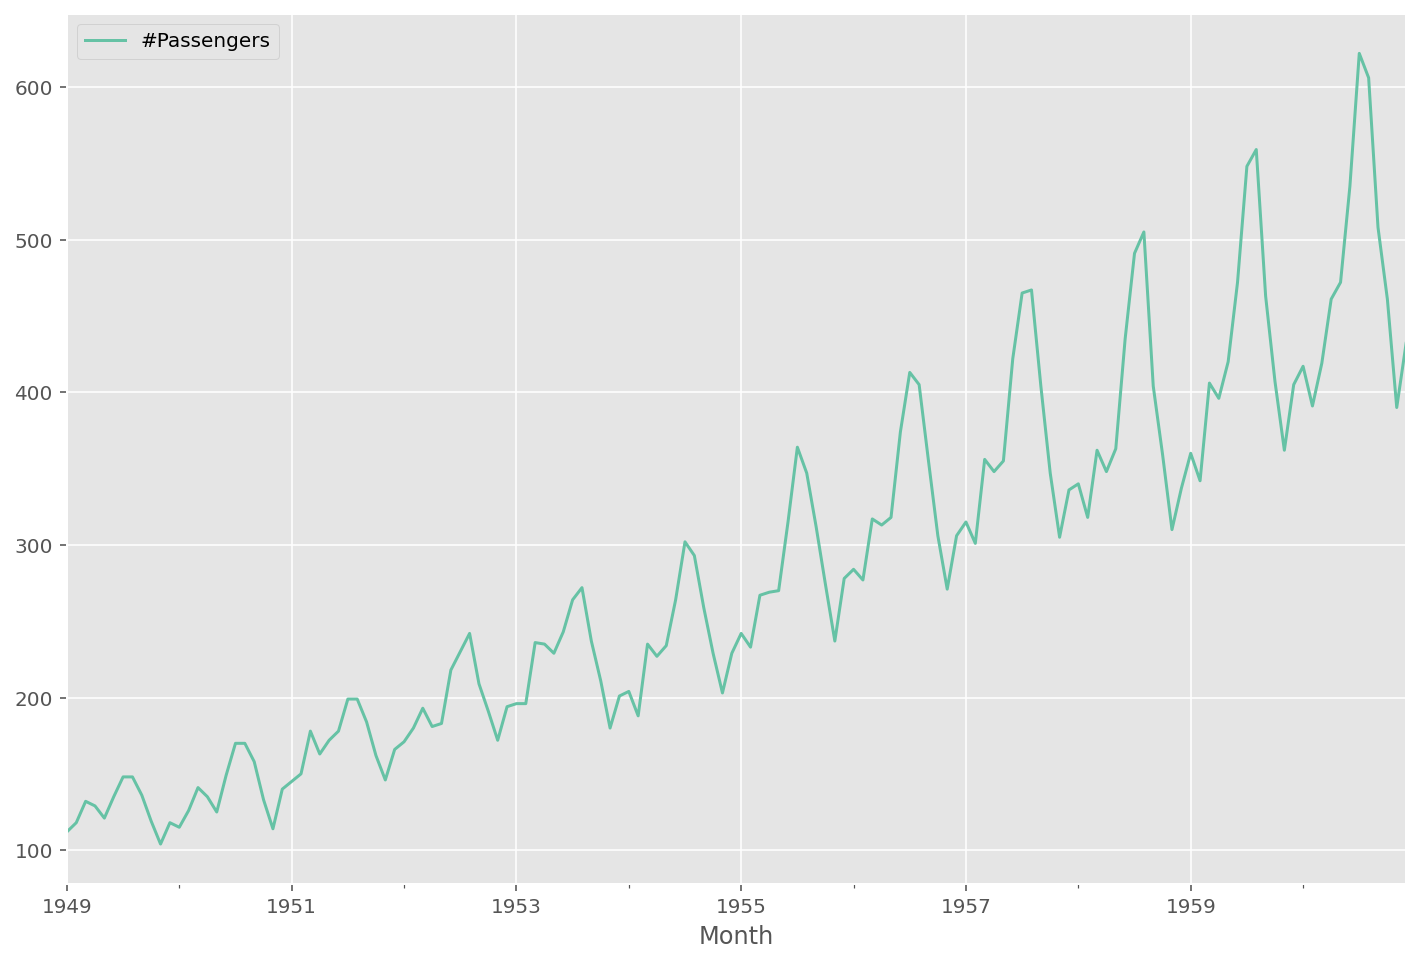

In [45]:
df.plot();

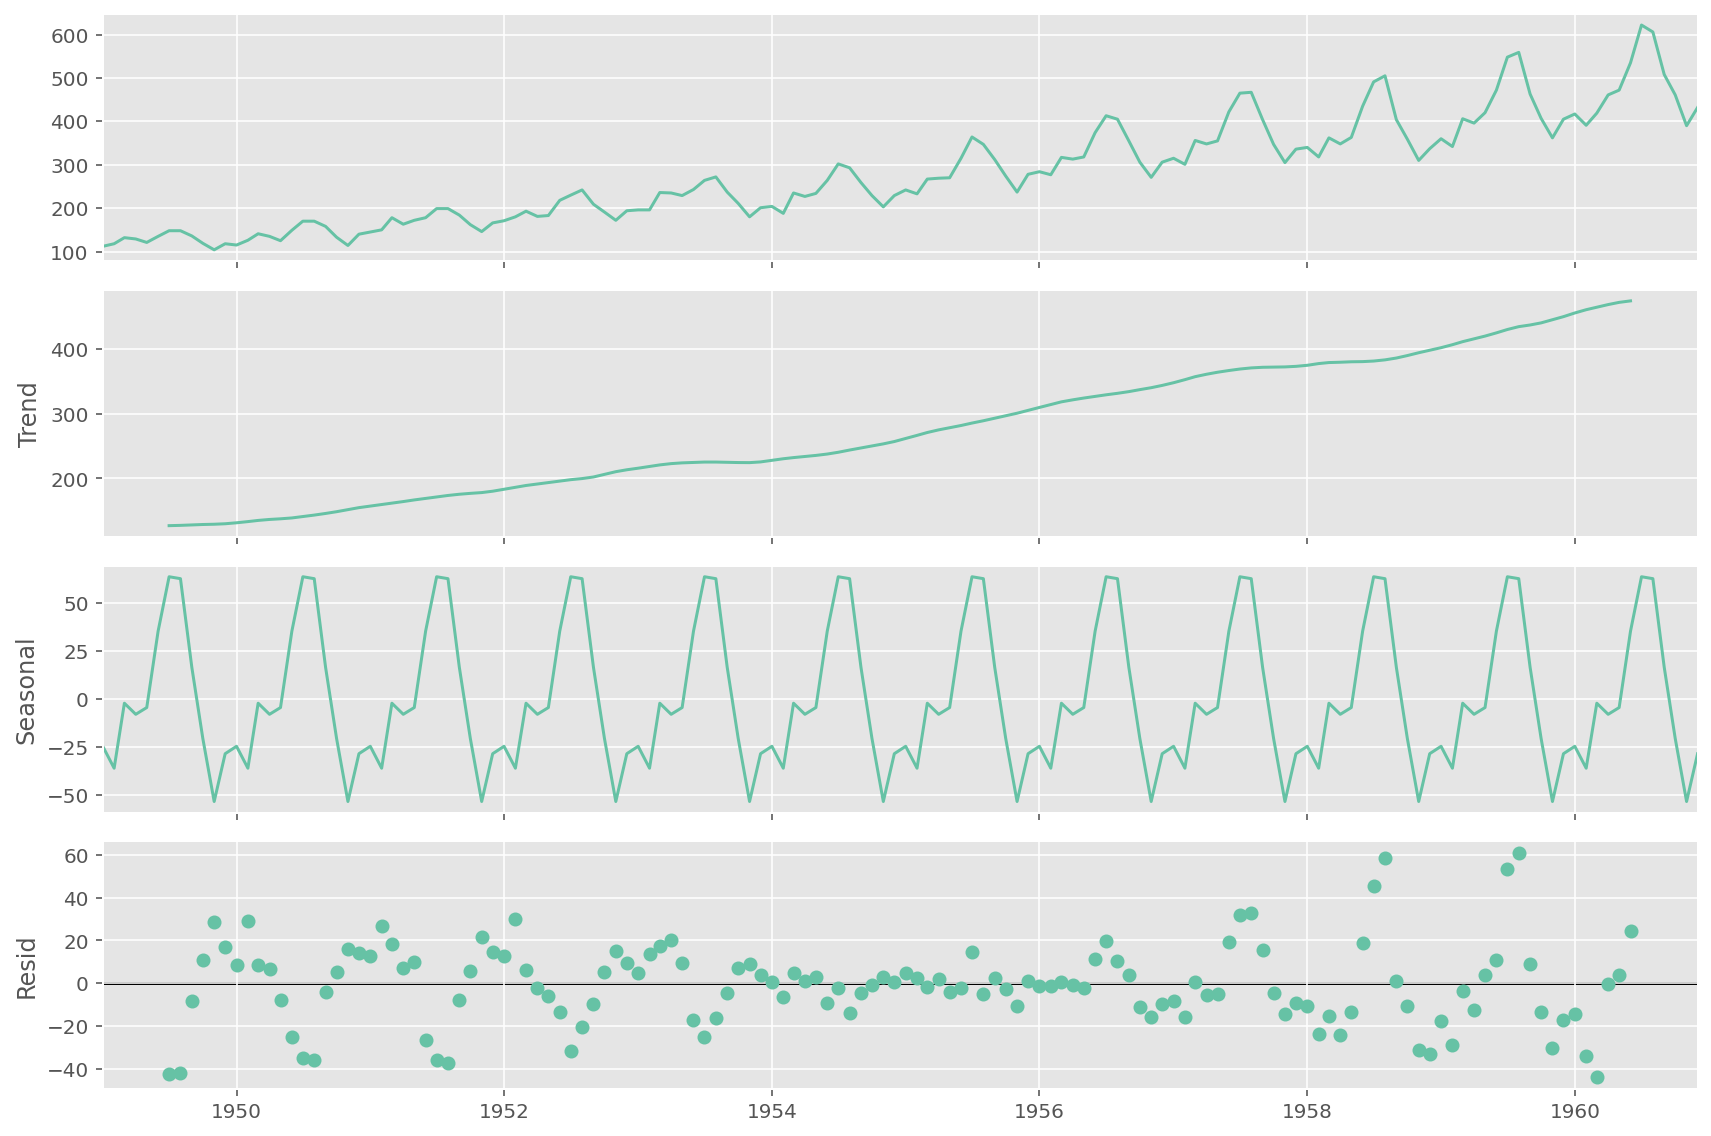

In [46]:
# импортируем библиотеку 
from statsmodels.tsa.seasonal import seasonal_decompose
# производим декомпозицию временного ряда 
decomposition = seasonal_decompose(df)
fig = decomposition.plot()
plt.show()

### Экспоненциальное сглаживание

In [47]:
def exp_smth(x_t, a, s_t_1):
    return a * x_t + (1 - a) * s_t_1

data = np.array([15, 20, 25, 30, 25, 27])
a = 0.7
s = np.zeros(6)
s[0] = data[0]

for i in range(1, len(data)):
    s[i] = exp_smth(data[i], a, s[i-1])

print(s)

[15.      18.5     23.05    27.915   25.8745  26.66235]


In [48]:
from statsmodels.tsa.api import SimpleExpSmoothing

ses = SimpleExpSmoothing(data)
alpha = 0.7
model = ses.fit(smoothing_level=alpha, optimized=False)

forecast = model.forecast(1)
print(forecast)

[26.66235]


### Стационарность

In [49]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

df = pd.read_csv('data/daily-total-female-births.zip', 
                 header=0, index_col=0).squeeze("columns")

result = adfuller(df.values)

print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Critical Values:")

for key, value in result[4].items():
	print(f"\t{key}: {value:.3f}")

ADF Statistic: -4.808291253559765
p-value: 5.2434129901498554e-05
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [50]:
hd.adf(df.values, 0.01)

Test-Statistic: -4.808291253559765
P-Value: 5.2434129901498554e-05
Time series is stationary!


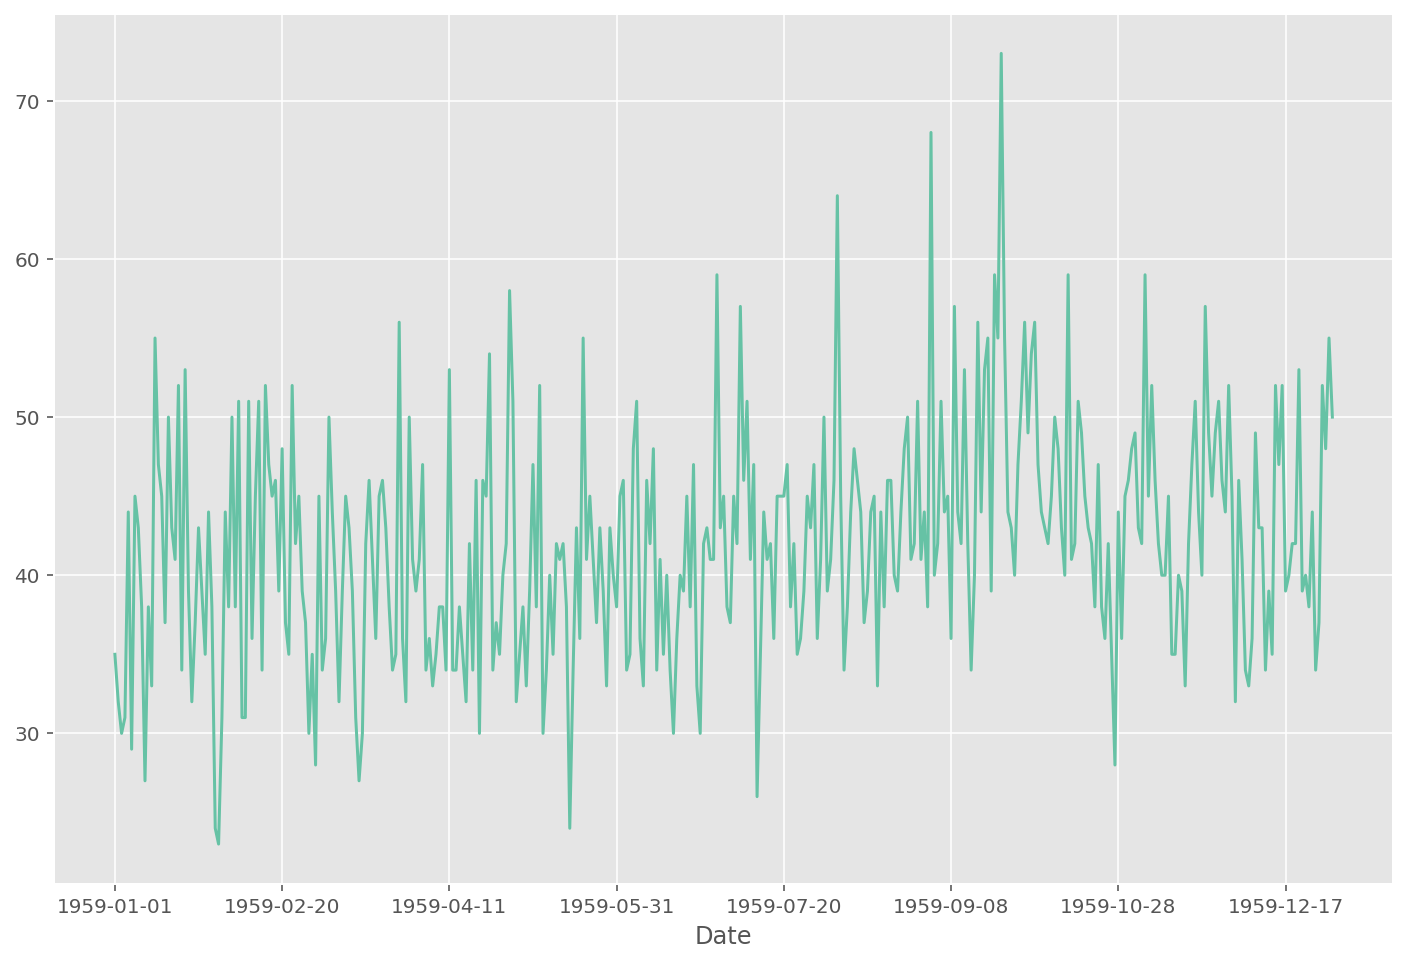

In [51]:
df.plot();

### Автокорреляция

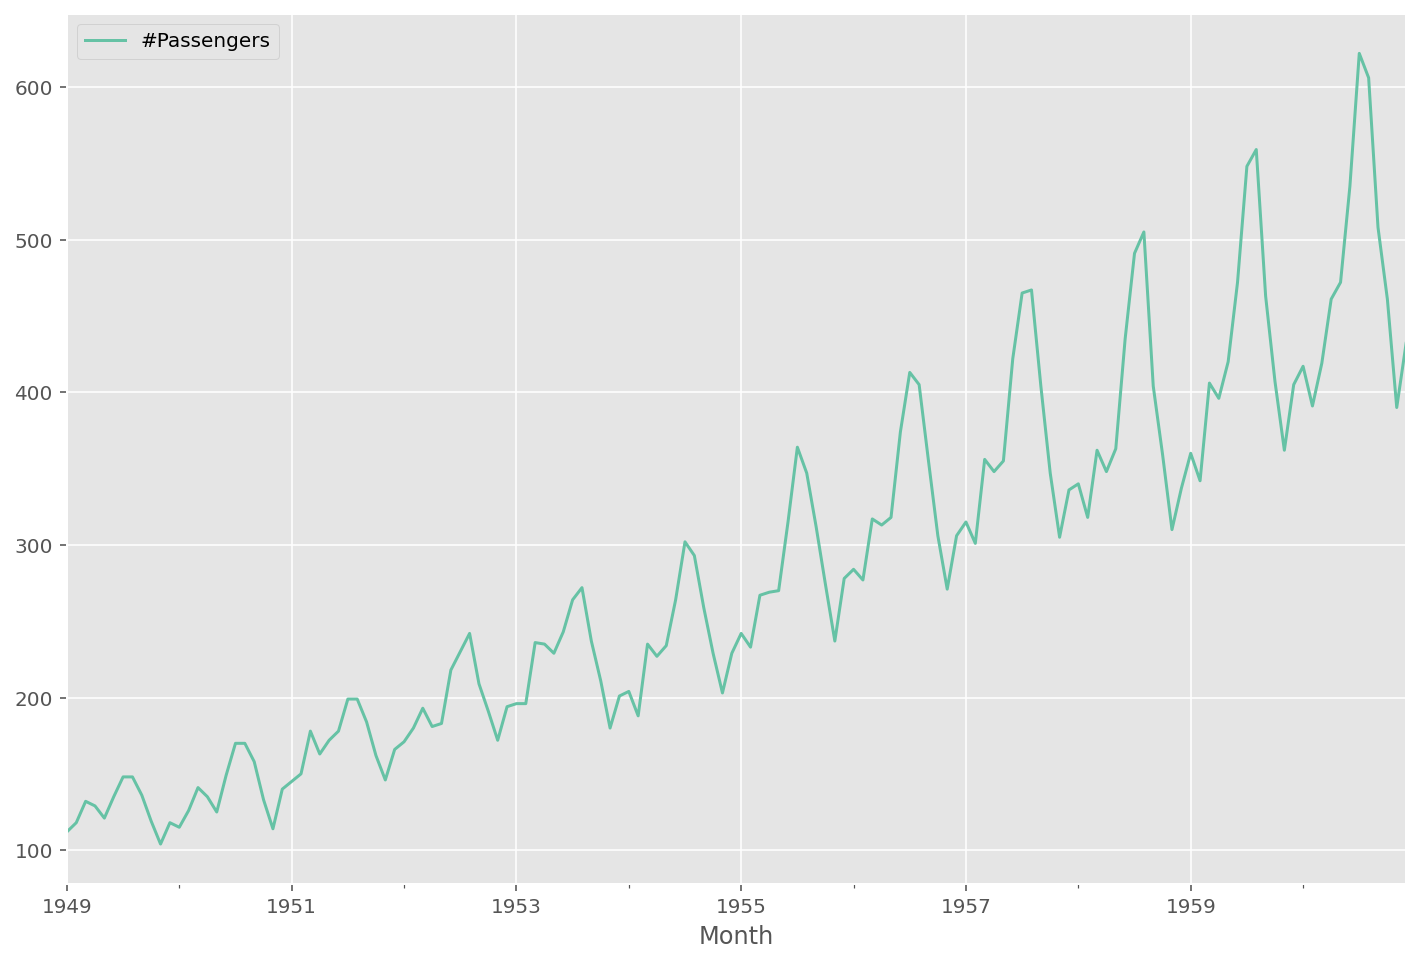

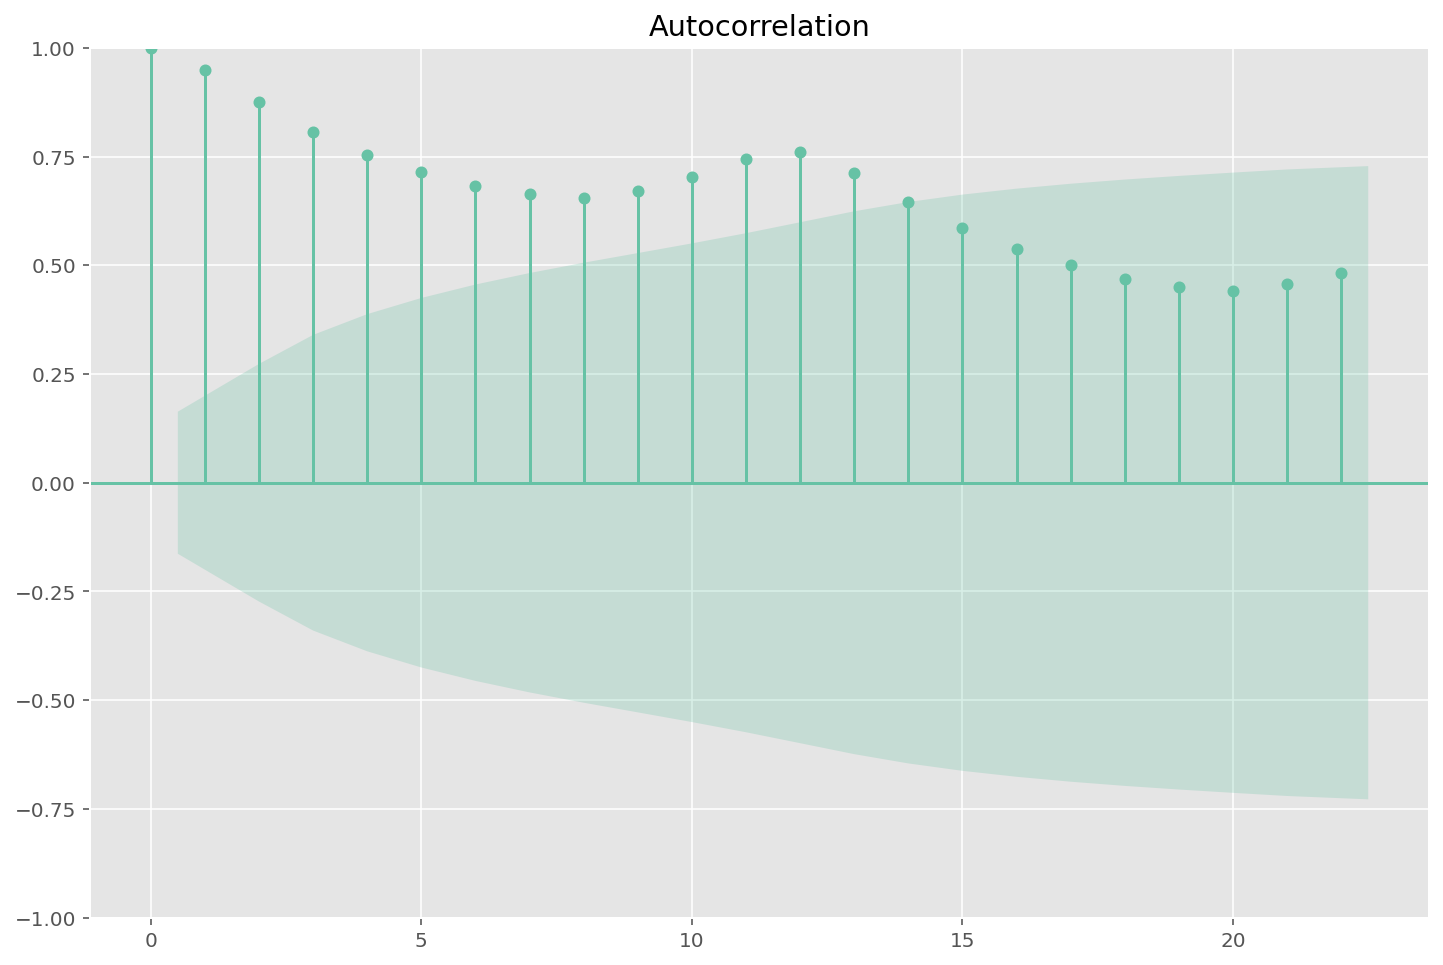

In [52]:
from statsmodels.graphics.tsaplots import plot_acf

df = pd.read_csv('data/AirPassengers.zip', index_col='Month', parse_dates=['Month'])
df.plot();
plot_acf(df['#Passengers']);

Стационарный ряд и изменения автокорреляции

In [53]:
df_diff2 = df.diff().diff().dropna()

Только двойное дифференцирование привело к тому, что ряд стал стационарным.

In [54]:
hd.adf(df_diff2['#Passengers'].values, 0.05)

Test-Statistic: -16.38423154246852
P-Value: 2.732891850014085e-29
Time series is stationary!


In [55]:
df_log = df.copy()
df_log['#Passengers'] = np.log(df_log['#Passengers'])

In [56]:
df_log_diff1 = df_log.diff().dropna()

In [57]:
hd.adf(df_log_diff1['#Passengers'].values, 0.05)

Test-Statistic: -2.7171305983881333
P-Value: 0.07112054815085872
Time series is non-stationary


<Axes: xlabel='Month'>

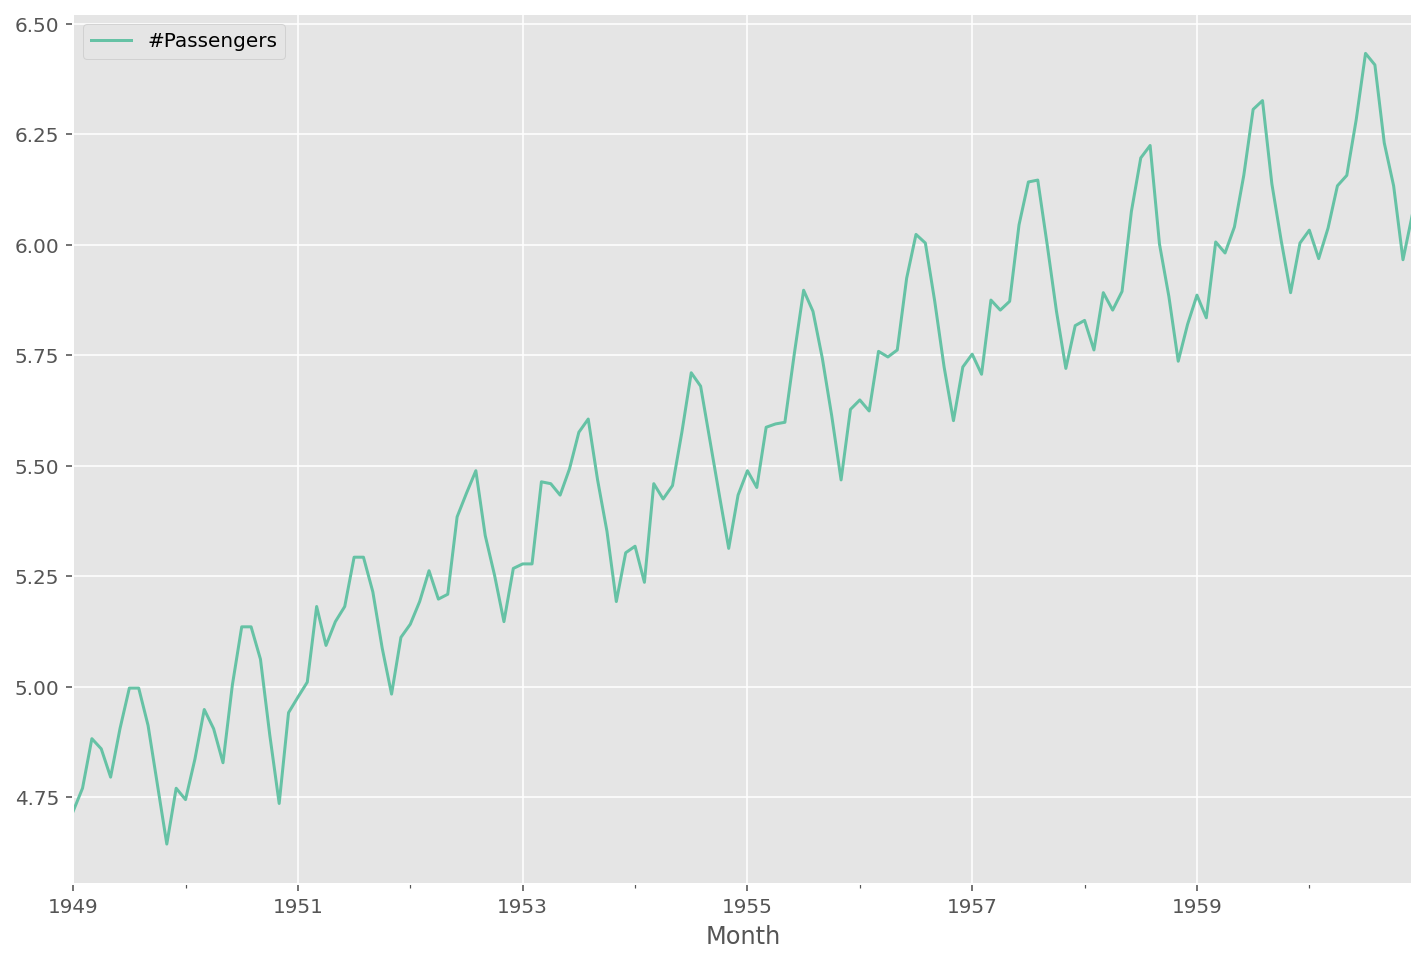

In [58]:
df_log.plot()

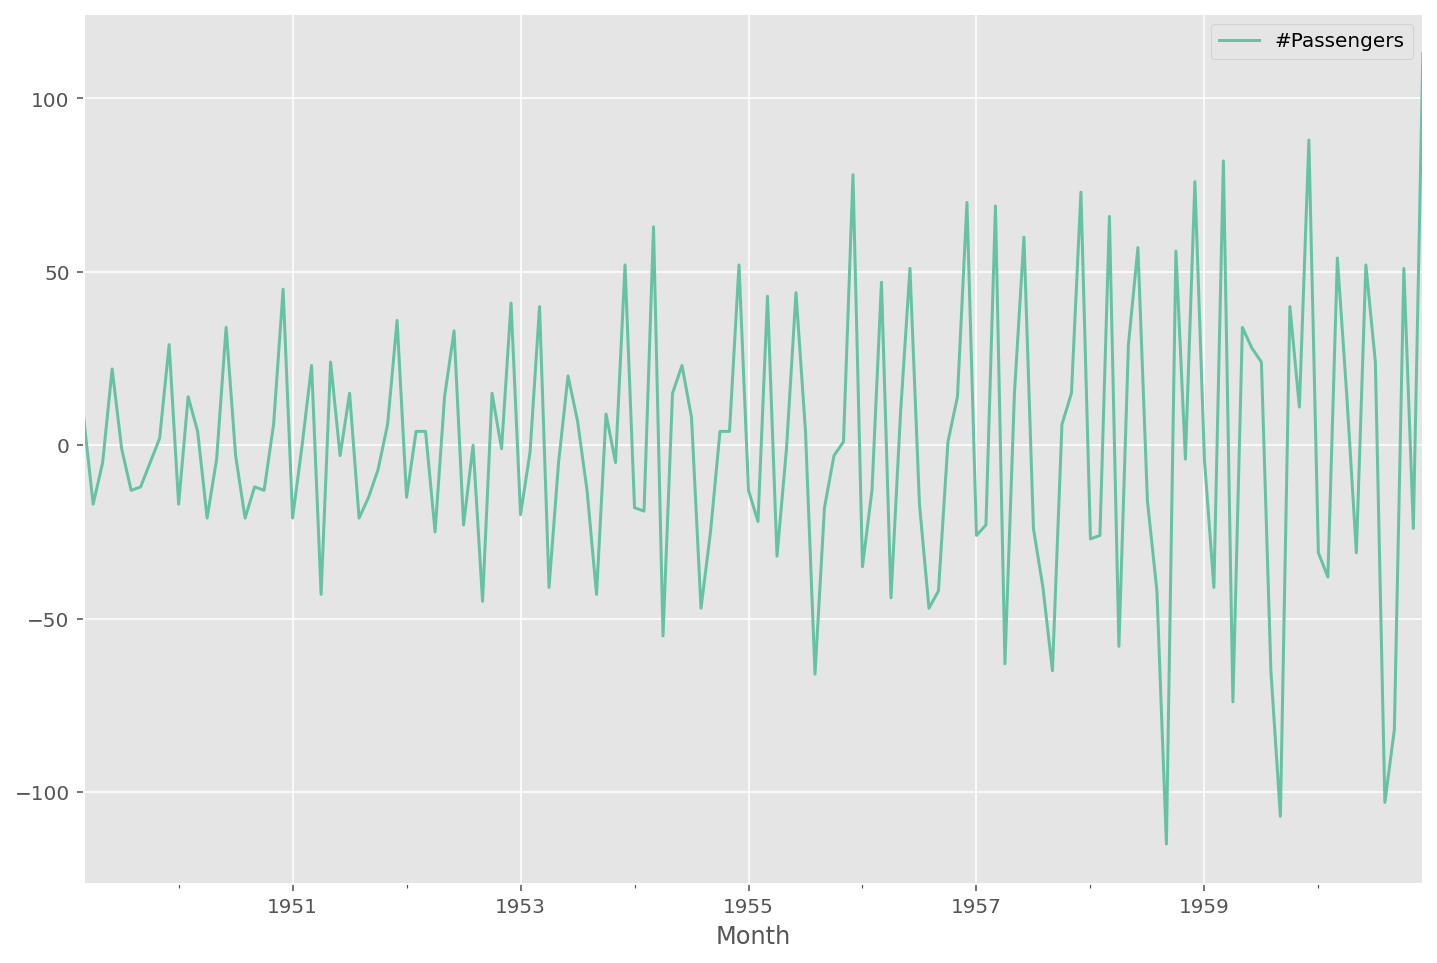

In [61]:

df_diff2.plot();

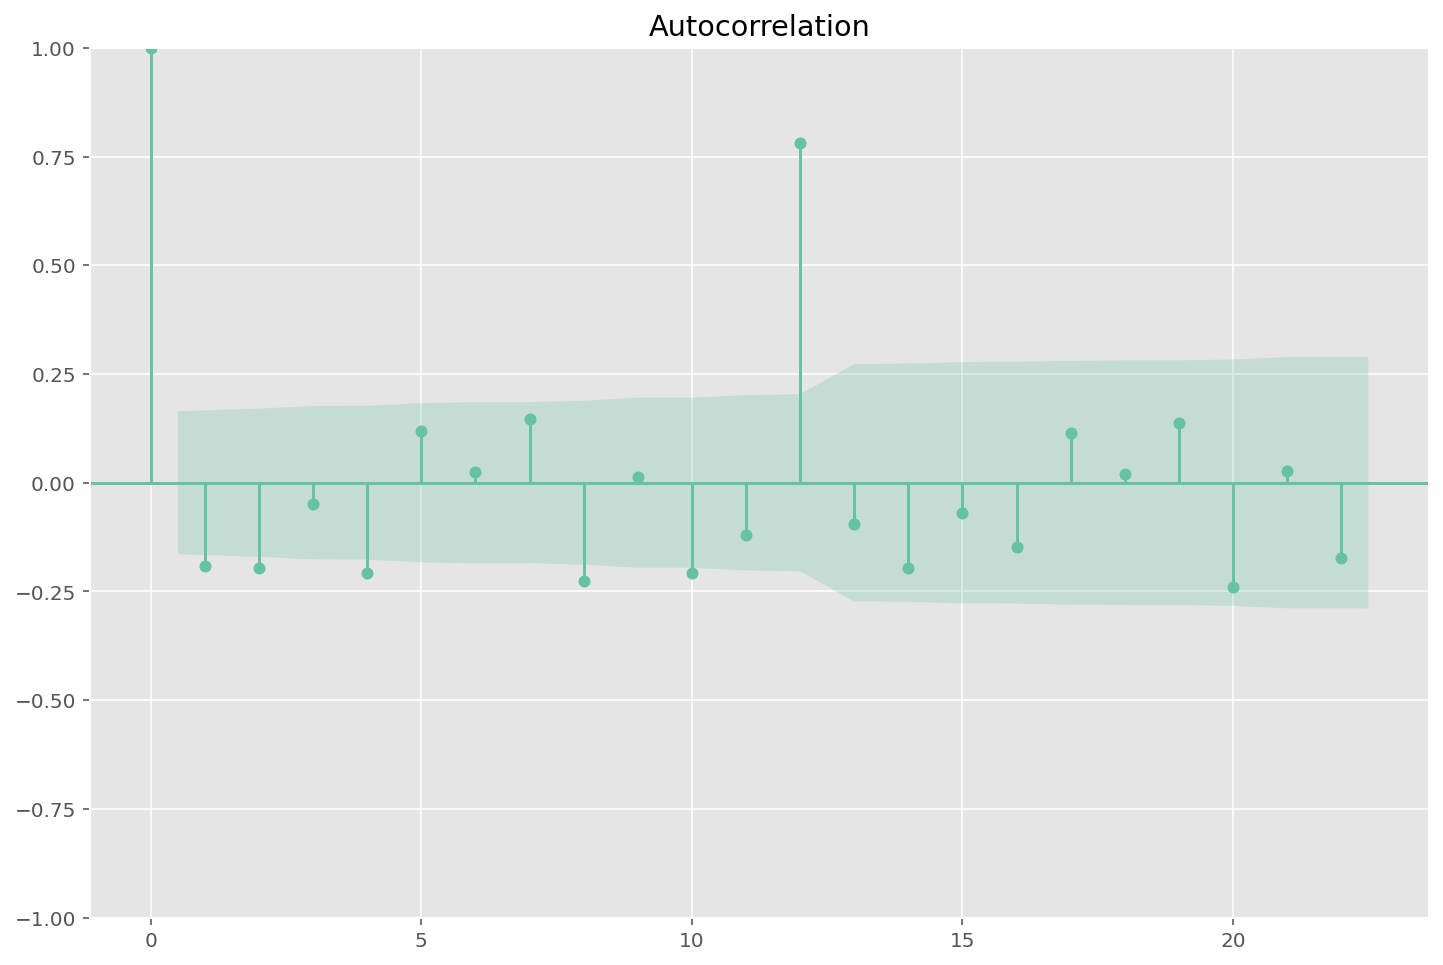

In [60]:
plot_acf(df_diff2['#Passengers']);